In [2]:
import pandas as pd
import os

In [3]:
os.getcwd()

'/Users/rrazak/development/Road to Data Science/learning with Python/Python A-Z'

In [4]:
movies = pd.read_csv("./data/Movie-Ratings.csv")

In [5]:
len(movies)

559

In [6]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [7]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [8]:
movies.columns = ["Film","Genre","CriticRatings","AudienceRatings","Budget","Year"]

In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film               559 non-null object
Genre              559 non-null object
CriticRatings      559 non-null int64
AudienceRatings    559 non-null int64
Budget             559 non-null int64
Year               559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [10]:
movies.describe()

,CriticRatings,AudienceRatings,Budget,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [11]:
movies.Year=movies.Year.astype('category')

In [12]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film               559 non-null object
Genre              559 non-null object
CriticRatings      559 non-null int64
AudienceRatings    559 non-null int64
Budget             559 non-null int64
Year               559 non-null category
dtypes: category(1), int64(3), object(2)
memory usage: 22.7+ KB


In [13]:
movies.Film=movies.Film.astype('category')

In [14]:
#categories in python are similar to factors in R

In [15]:
movies.Genre=movies.Genre.astype('category')

In [16]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film               559 non-null category
Genre              559 non-null category
CriticRatings      559 non-null int64
AudienceRatings    559 non-null int64
Budget             559 non-null int64
Year               559 non-null category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [17]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [18]:
movies.head()

,Film,Genre,CriticRatings,AudienceRatings,Budget,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [19]:
#working with joint plots
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

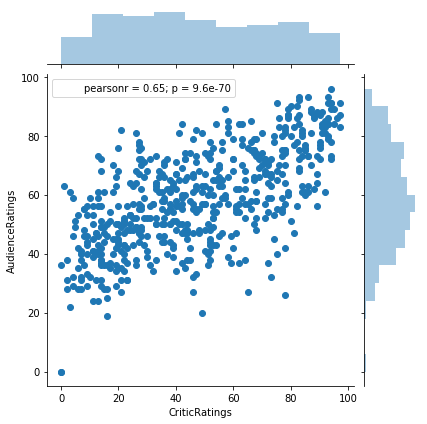

In [20]:
j = sns.jointplot(data=movies,x="CriticRatings",y="AudienceRatings")

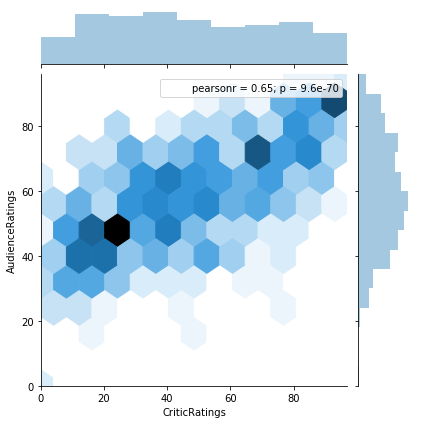

In [21]:
j = sns.jointplot(data=movies,x="CriticRatings",y="AudienceRatings",kind = "hex")

In [22]:
#Histograms


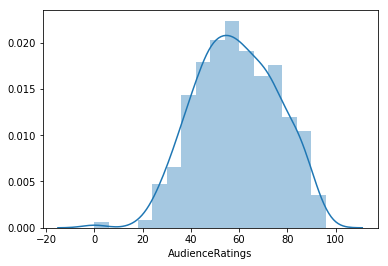

In [23]:
m1 = sns.distplot(movies.AudienceRatings)

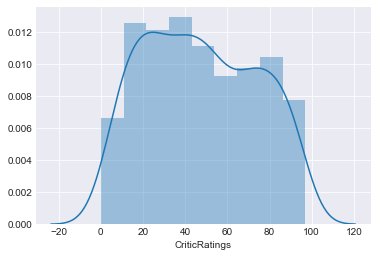

In [24]:
sns.set_style("darkgrid")
m2 = sns.distplot(movies.CriticRatings)

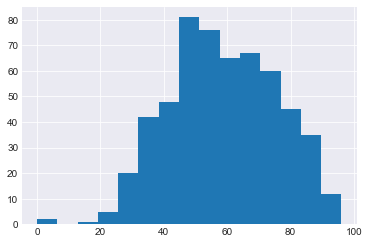

In [25]:
n1=plt.hist(movies.AudienceRatings,bins=15)

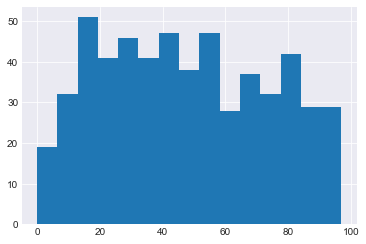

In [26]:
n1=plt.hist(movies.CriticRatings,bins=15)

In [27]:
#Stacked Histograms

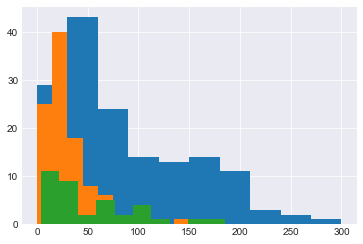

In [28]:
movies[movies.Genre == "Drama"]

plt.hist(movies[movies.Genre =='Action'].Budget)
plt.hist(movies[movies.Genre =='Drama'].Budget)
plt.hist(movies[movies.Genre =='Thriller'].Budget)
plt.show()

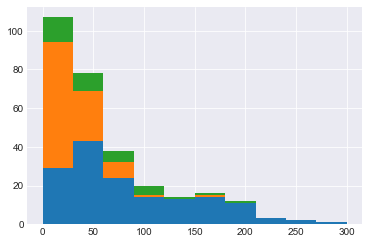

In [29]:
plt.hist([movies[movies.Genre =='Action'].Budget,movies[movies.Genre =='Drama'].Budget,movies[movies.Genre =='Thriller'].Budget],stacked=True)
plt.show()

In [30]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [31]:
#lets try to do this via loop
for i in movies.Genre.cat.categories:
    print(i)

Action
Adventure
Comedy
Drama
Horror
Romance
Thriller


In [32]:
genrelist=list()
genlables=list()
for i in movies.Genre.cat.categories:
    genrelist.append(movies[movies.Genre==i].Budget)
    genlables.append(i)
#print(genrelist)

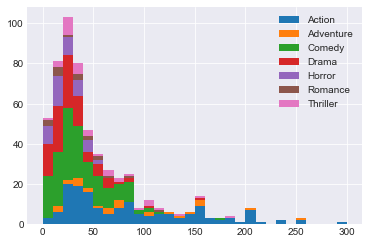

In [33]:

h=plt.hist(genrelist,bins=30,stacked=True,label=genlables)
plt.legend()

In [34]:
#KDE PLOT - Kernel density estimate plot

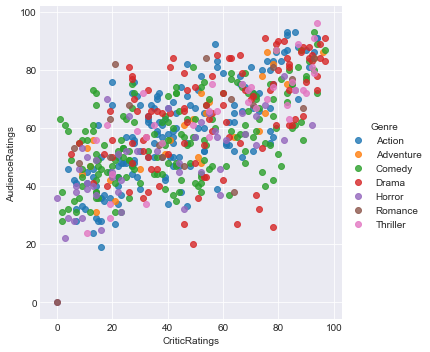

In [35]:
vis1 = sns.lmplot(data=movies,x='CriticRatings',y='AudienceRatings',fit_reg=False,hue='Genre')

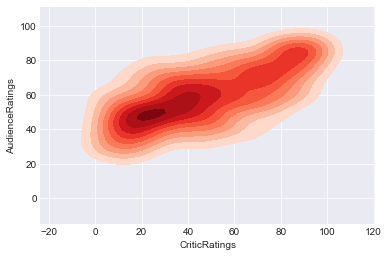

In [36]:
k1 = sns.kdeplot(movies.CriticRatings,movies.AudienceRatings,shade = True,shade_lowest=False,cmap='Reds')

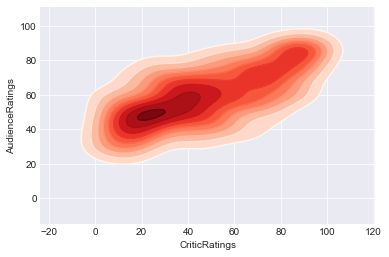

In [37]:
#TIP
k1 = sns.kdeplot(movies.CriticRatings,movies.AudienceRatings,shade = True,shade_lowest=False,cmap='Reds')
#TIP
k1 = sns.kdeplot(movies.CriticRatings,movies.AudienceRatings,cmap="Reds")

In [38]:
#working with subplots

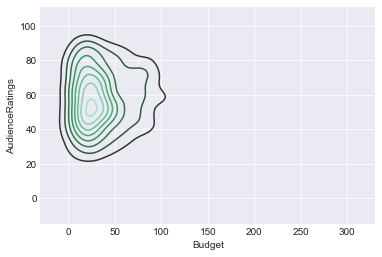

In [39]:
k1 = sns.kdeplot(movies.Budget,movies.AudienceRatings)

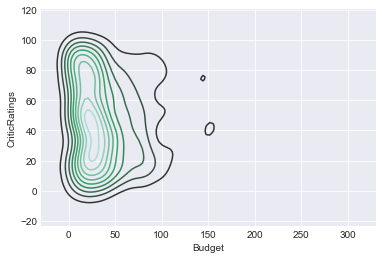

In [40]:
k1 = sns.kdeplot(movies.Budget,movies.CriticRatings)

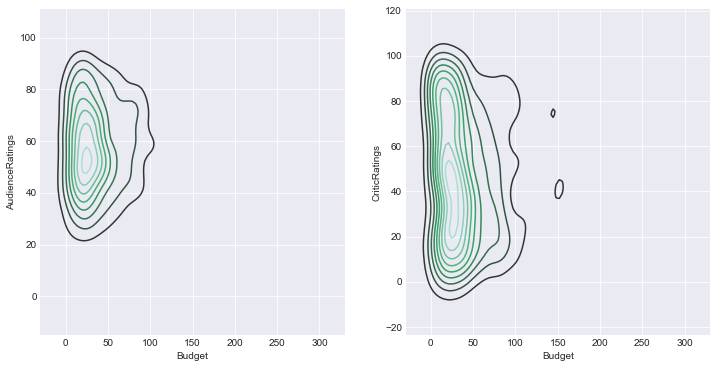

In [41]:
f, axes = plt.subplots(1,2,figsize=(12,6))
k1 = sns.kdeplot(movies.Budget,movies.AudienceRatings,ax=axes[0])
k2 = sns.kdeplot(movies.Budget,movies.CriticRatings,ax=axes[1])


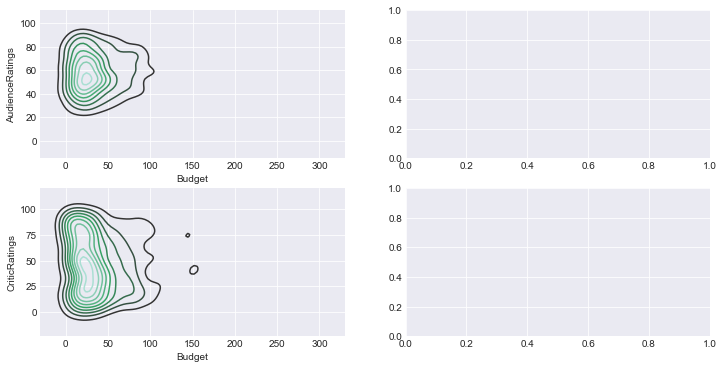

In [42]:
f, axes = plt.subplots(2,2,figsize=(12,6))
k1 = sns.kdeplot(movies.Budget,movies.AudienceRatings,ax=axes[0,0])
#k1 = sns.kdeplot(movies.Budget,movies.AudienceRatings,ax=axes[0]) 
#give an error as its a 2D array now.
k2 = sns.kdeplot(movies.Budget,movies.CriticRatings,ax=axes[1,0])

[(-20, 160)]

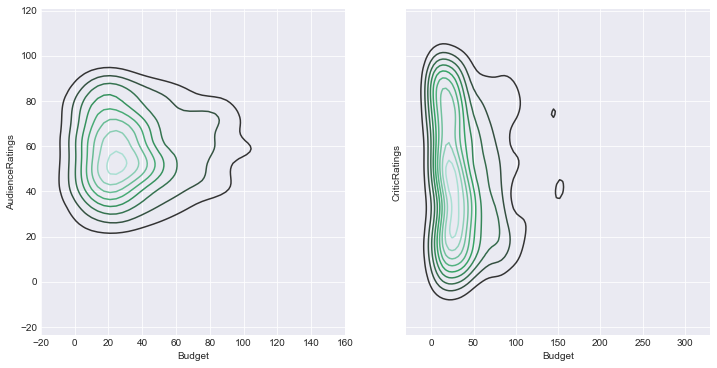

In [43]:
f, axes = plt.subplots(1,2,figsize=(12,6),sharey=True)
k1 = sns.kdeplot(movies.Budget,movies.AudienceRatings,ax=axes[0])
k2 = sns.kdeplot(movies.Budget,movies.CriticRatings,ax=axes[1])
k1.set(xlim=(-20,160))

---

In [44]:
#violin plots

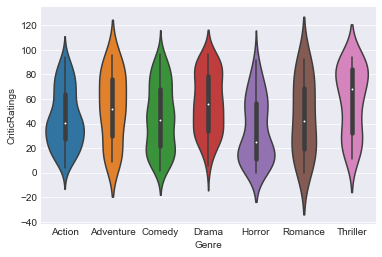

In [45]:
z=sns.violinplot(data=movies,x='Genre',y='CriticRatings')

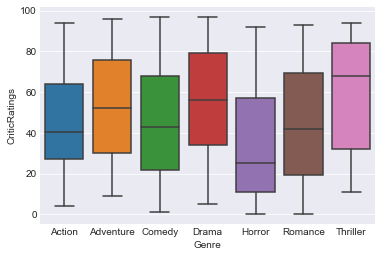

In [46]:
w=sns.boxplot(data=movies,x='Genre',y='CriticRatings')

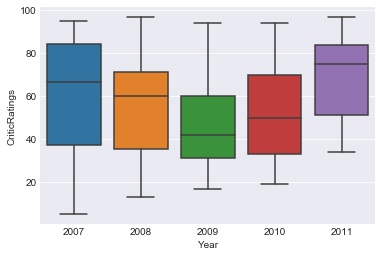

In [47]:
w=sns.boxplot(data=movies[movies.Genre=="Drama"],x='Year',y='CriticRatings')

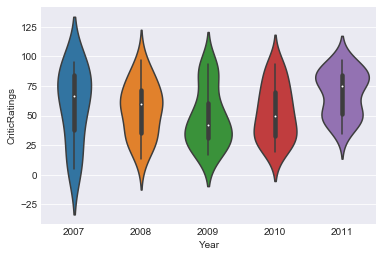

In [48]:
w=sns.violinplot(data=movies[movies.Genre=="Drama"],x='Year',y='CriticRatings')

 ---

In [49]:
#Facet Grid

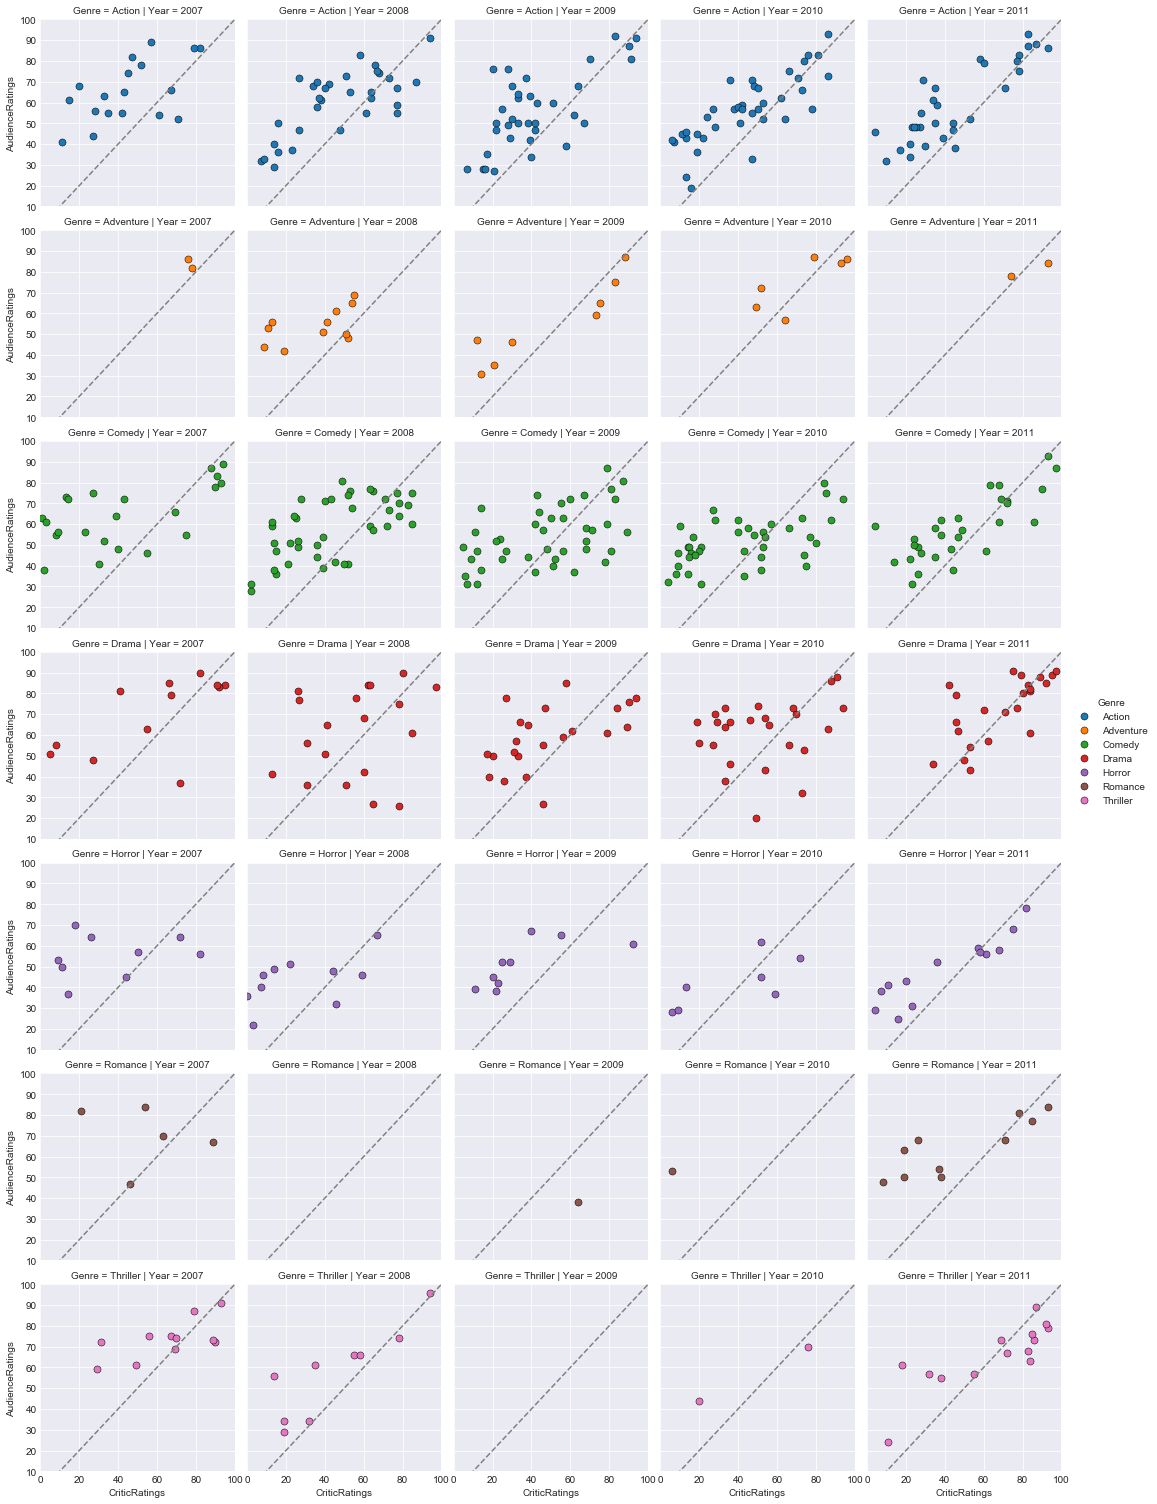

In [59]:
#g = sns.FacetGrid(movies,row='Genre',hue='Genre')
g = sns.FacetGrid(movies,row='Genre',col='Year',hue='Genre')
kws = dict(s=50,linewidth=0.5,edgecolor='black')
g = g.map(plt.scatter,'CriticRatings','AudienceRatings',**kws)
g.set(xlim=(0,100),ylim=(10,100))
for ax in g.axes.flat:
    ax.plot((0,100),(0,100),c='gray',ls='--')
g.add_legend()

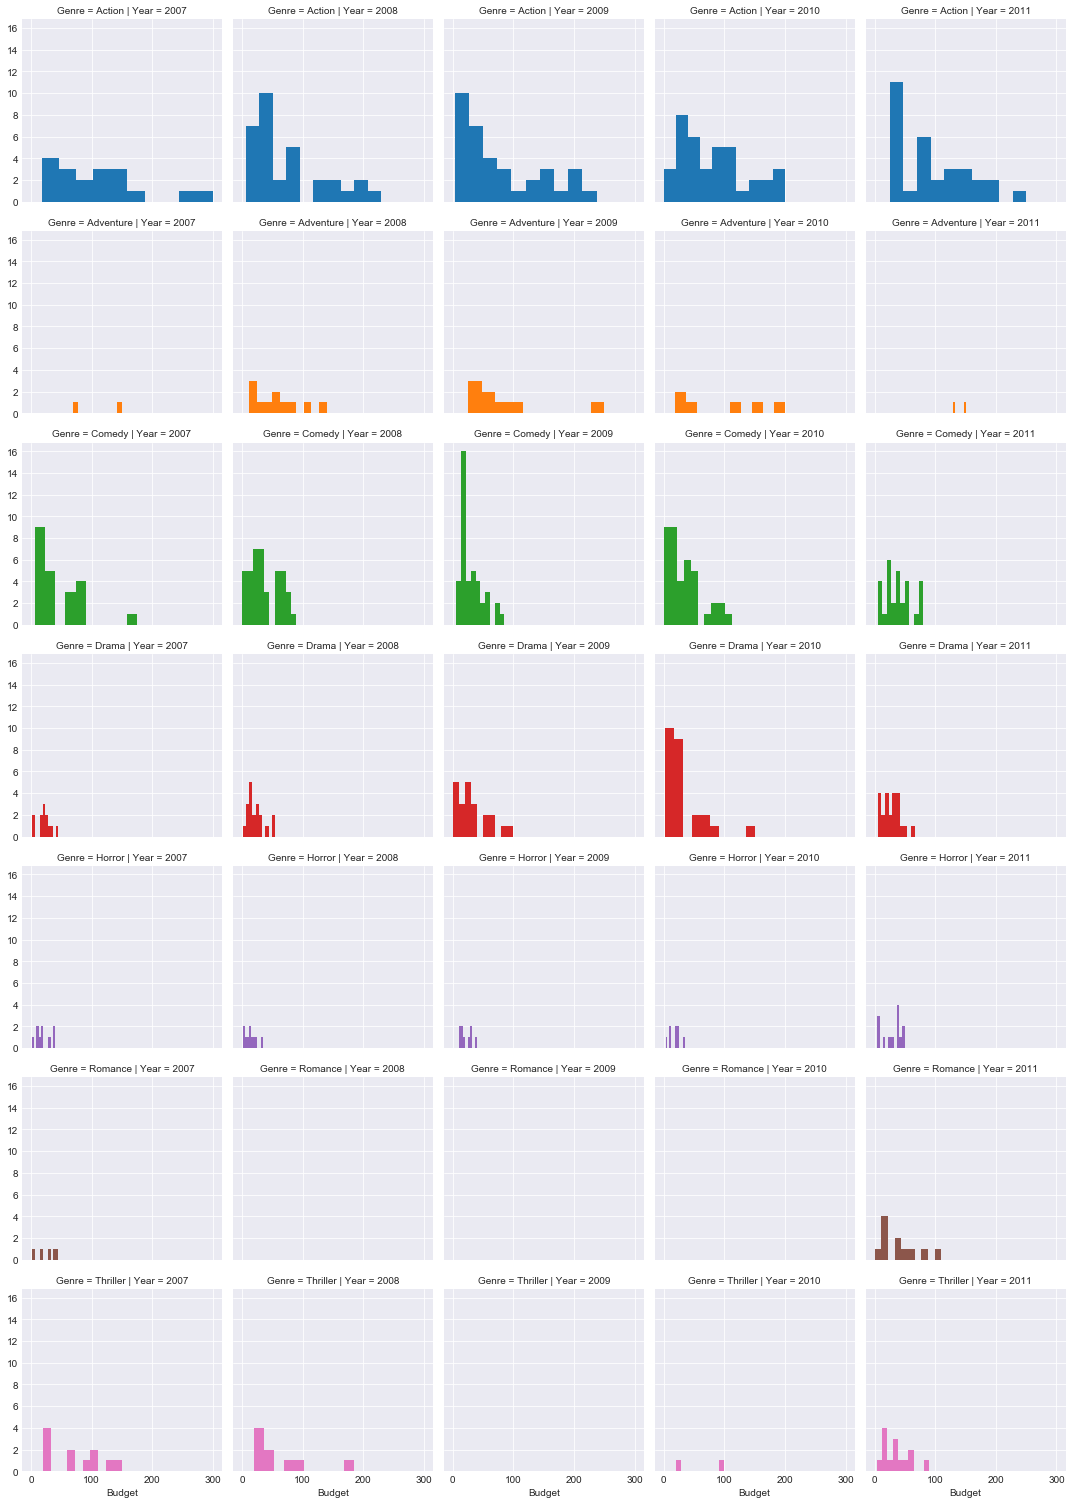

In [51]:
g = sns.FacetGrid(movies,row='Genre',col='Year',hue='Genre')
g = g.map(plt.hist,'Budget')

In [60]:
#building dashboards
#Yaaa-Fucking-aaay

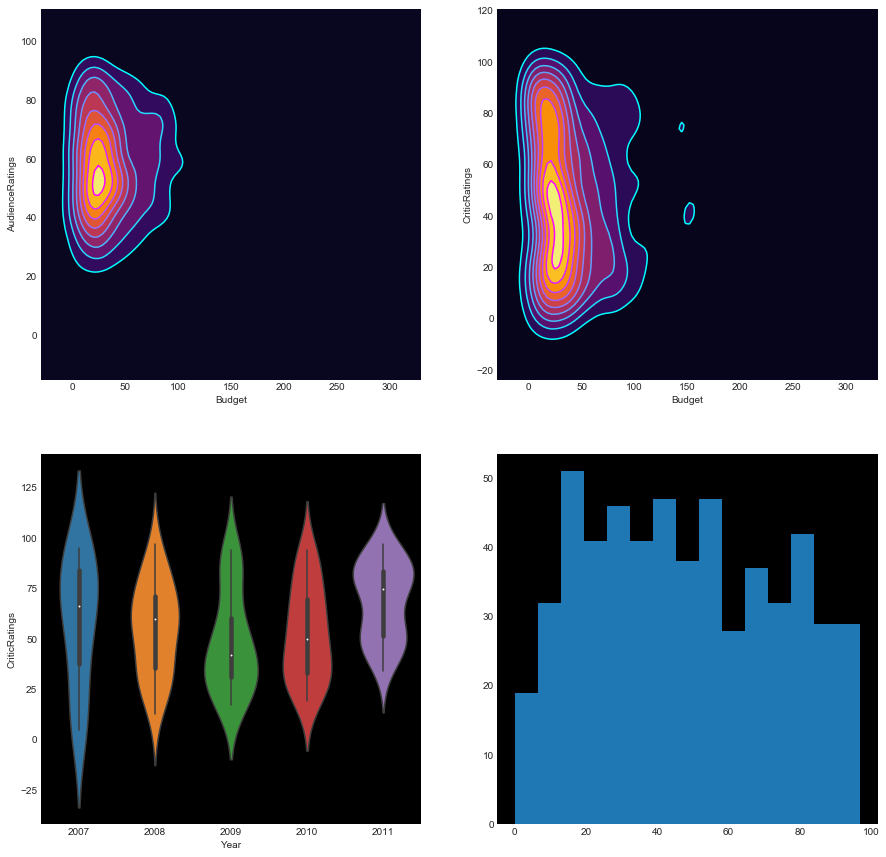

In [79]:
sns.set_style("dark", {"axes.facecolor":"black"})
f,axes = plt.subplots(2,2,figsize=(15,15))
k1 = sns.kdeplot(movies.Budget,movies.AudienceRatings, \
                 ax=axes[0,0],cmap='inferno',shade=True,shade_lowest=True)
k1b = sns.kdeplot(movies.Budget,movies.AudienceRatings, \
                 ax=axes[0,0],cmap='cool')


#k1 = sns.kdeplot(movies.Budget,movies.AudienceRatings,ax=axes[0]) 
#give an error as its a 2D array now.
k2 = sns.kdeplot(movies.Budget,movies.CriticRatings,\
                 ax=axes[0,1],cmap='inferno',shade=True,shade_lowest=True)
k2b = sns.kdeplot(movies.Budget,movies.CriticRatings,\
                 ax=axes[0,1],cmap='cool')



w=sns.violinplot(data=movies[movies.Genre=="Drama"],x='Year',y='CriticRatings',ax=axes[1,0])

#k3 = sns.kdeplot(movies.CriticRatings,movies.AudienceRatings,shade = True,shade_lowest=False,cmap='Reds',ax=axes[1,1])
#k3 = sns.kdeplot(movies.CriticRatings,movies.AudienceRatings,cmap="Reds",ax=axes[1,1])

#To add a non seaborn plot to be added in the subplot, its actually different. 
axes[1,1].hist(movies.CriticRatings,bins=15)
plt.show()

---

In [ ]:
#Styling Dashboards
